# Load Dataset

In this notebook, we will load the dataset and display some plots to understand its statistics.


In [1]:
import re
import seaborn as sns
from rich import print
from datasets import load_dataset
from pyarabic.araby import strip_tashkeel
from pyarabic.araby import sentence_tokenize as sent_tokenize

In [2]:
sns.set_theme(context='notebook', style='dark')

In [3]:
data_ckpt, sub_data = 'wikimedia/wikipedia', '20231101.ar'

In [4]:
# we are using the first 10_000 articles only from the dataset
ds = load_dataset(data_ckpt, sub_data, split='train[:10000]')

In [5]:
ds

Dataset({
    features: ['id', 'url', 'title', 'text'],
    num_rows: 10000
})

In [6]:
text = ds[0]['text']
text = re.sub(r'\n+', '\n', text)

In [7]:
len(text)

48710

In [8]:
len(text.split('\n'))

173

In [9]:
sents = sent_tokenize(text)
len(sents)

33

In [10]:
sent_lens1 = [len(s) for s in text.split('\n')]
sent_lens2 = [len(s) for s in sents]

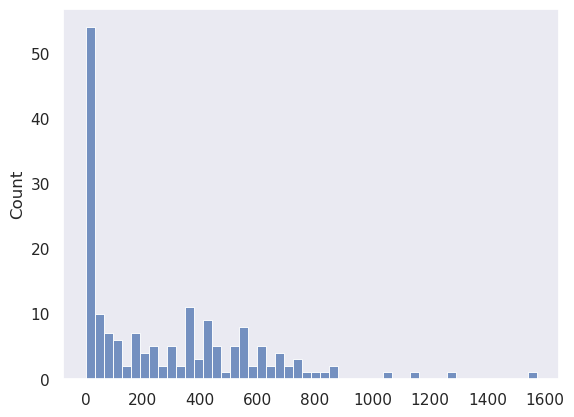

In [11]:
_ = sns.histplot(sent_lens1, bins=50)

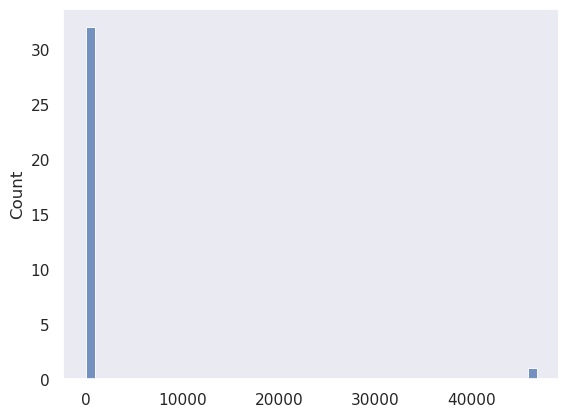

In [12]:
_ = sns.histplot(sent_lens2, bins=50)

In [13]:
print(sents[0])

الماء مادةٌ شفافةٌ عديمة اللون والرائحة،

In [14]:
ds = ds.map(lambda x: {'clean_text': re.sub(
    r'\n+', '\n', x['text'])}, num_proc=16)
ds

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'clean_text'],
    num_rows: 10000
})

In [15]:
ds = ds.map(lambda x: {'sentences': sent_tokenize(
    x['clean_text'])}, num_proc=16)
ds

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'clean_text', 'sentences'],
    num_rows: 10000
})

In [16]:
print(ds[0]['sentences'][0])

الماء مادةٌ شفافةٌ عديمة اللون والرائحة،

In [17]:
ds = ds.map(lambda x: {'clean_sentences': [
            strip_tashkeel(s) for s in x['sentences']]}, num_proc=16)
ds

Map (num_proc=16):   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'url', 'title', 'text', 'clean_text', 'sentences', 'clean_sentences'],
    num_rows: 10000
})

In [18]:
print(ds[0]['clean_sentences'][0])

الماء مادة شفافة عديمة اللون والرائحة،

In [19]:
all_sents = [s for article in ds for s in article['clean_sentences']]

In [20]:
len(all_sents)

243709

In [21]:
print(all_sents[0])

الماء مادة شفافة عديمة اللون والرائحة،

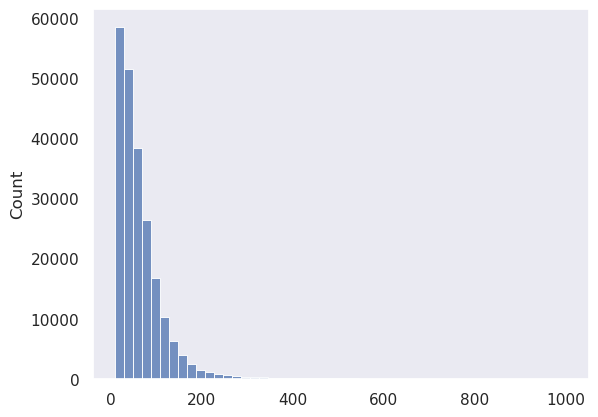

In [22]:
_ = sns.histplot([len(s) for s in all_sents], binrange=(10, 1000), bins=50)

In [23]:
# Filter sentences that are less than 10 characters and more than 512 characters
all_sents = [s for s in all_sents if 10 <= len(s) <= 512]
len(all_sents)

221068

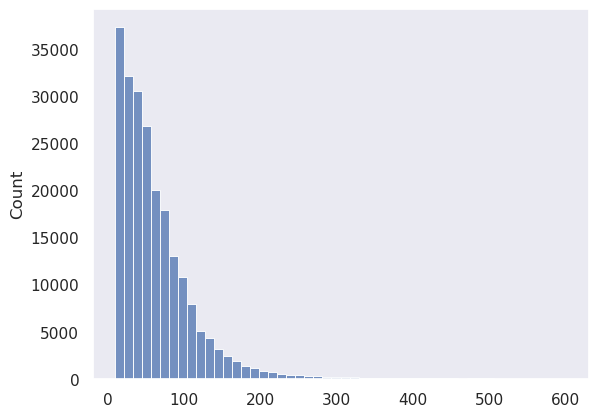

In [24]:
_ = sns.histplot([len(s) for s in all_sents], binrange=(10, 600), bins=50)

In [25]:
with open('../data/sentences.txt', 'w') as f:
    f.write('\n'.join(all_sents) + '\n')